# Factors Affecting Students Performance in Exam/Test
## by Benjamin Ogbonna
### Last updated 23 August, 2022

## Investigation Overview


> In this investigation, I wanted to look at some of the factors that contribute or affect students performance in exam. Our main focus will be on Parental level of education, test preparation course, race/ethnicity and lunch (standard or free/reduced).


## Dataset Overview

> This dataset consist of 1000 grades of student who took an exam/test with the following attributes:
0 gender<br/>
1 race/ethnicity<br/>
2 parental level of education<br/>
3 lunch<br/>
4 test preparation course<br/>
5 math score<br/>
6 reading score<br/>
7 writing score<br/>
This data was gotten from [kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams), a public data repository.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('fivethirtyeight')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

# get data

student_data = pd.read_csv('students_performance_data.csv')

In [3]:
# view some samples of data

student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# create a new column for total score, adding math, reading and writing score together

student_data['total_score'] = student_data['math score'] + student_data['reading score'] + student_data['writing score']

student_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148


In [5]:
# Creating a another new column for grade, to grade students based on their scores (A, B, C, D or F):

# 0-59 =   F
# 60-69 =  D
# 70-79 =  C
# 80-89 =  B
# 90-100 = A

student_data['grade'] = ['F' if score < 60 else 'D' if 60<=score<70 else 'C' if 70<=score<80 else 'B' if 80<=score<90 else 'A' for score in ((student_data.total_score/300) *100)]

student_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,C
1,female,group C,some college,standard,completed,69,90,88,247,B
2,female,group B,master's degree,standard,none,90,95,93,278,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,F
4,male,group C,some college,standard,none,76,78,75,229,C
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,A
996,male,group C,high school,free/reduced,none,62,55,55,172,F
997,female,group C,high school,free/reduced,completed,59,71,65,195,D
998,female,group D,some college,standard,completed,68,78,77,223,C


### So After adding two columns, total_score and grade our dataset looks better.

In [6]:
student_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,C
1,female,group C,some college,standard,completed,69,90,88,247,B
2,female,group B,master's degree,standard,none,90,95,93,278,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,F
4,male,group C,some college,standard,none,76,78,75,229,C


## Distribution of Gender
Out plot show there were more females than males who took the test.

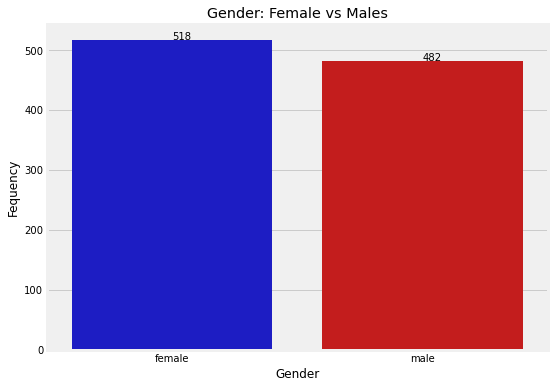

In [7]:
plt.figure(figsize=(8, 6))
values = student_data.gender.value_counts().values
colors = ["#0101DF", "#DF0101"]
plt.title('Gender: Female vs Males')
ax = sb.countplot(x='gender', data=student_data, palette=colors)
for x, y in enumerate(ax.patches):
    height = y.get_height()
    ax.text(y.get_x()+y.get_width()/2., height + .1, values[x])
plt.xlabel('Gender')
plt.ylabel('Fequency')
plt.show()

## Distribustion of Grades (A, B, C, D, F)
Many student got below average. Of our 1000 students, 52 got A, 146 got B, 256 got D, 261 got C and 285 got F

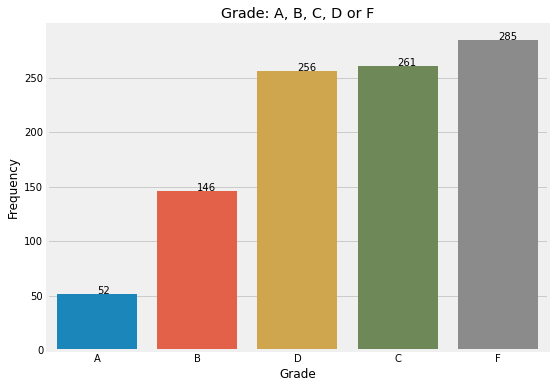

A     52
B    146
D    256
C    261
F    285
Name: grade, dtype: int64


In [8]:
# Grades are plotted in ascending order

plt.figure(figsize=(8, 6))
values = student_data['grade'].value_counts(ascending=True).values
# colors = ['#0101DF', "#DF0101"]
plt.title('Grade: A, B, C, D or F')
ax = sb.countplot(x='grade', data=student_data, order=student_data['grade'].value_counts(ascending=True).index)
for x, y in enumerate(ax.patches):
    height = y.get_height()
    ax.text(y.get_x()+y.get_width()/2., height + .1, values[x])
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()
print(student_data['grade'].value_counts(ascending=True))

## Grade and Parental level of education

> Students whose parents completed just high school did very poor in the test, they got more F's and less than 10 A's. And students whose parents are masters holders did better. This therefore shows that educated parents plays or contribute to the success of their children (most times).

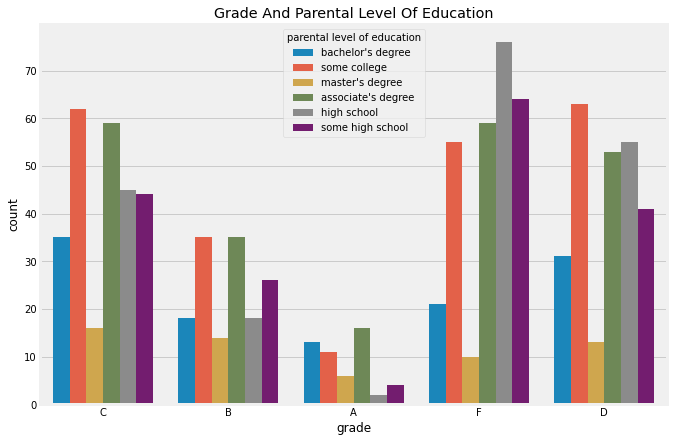

In [9]:
plt.figure(figsize=(10, 7))
plt.title('Grade and Parental level of education'.title())
sb.countplot(x='grade', hue='parental level of education', data=student_data)
plt.show()

## Grade and Test preparation course

> Students who completed the test preparation course did far better than those who did not take or complete the course. About 40 of those who completed the course had an A while less than 20 who did not complete it had an A. Again, over 300 of those who did not complet or take the course got an F while only about 60 Failed.

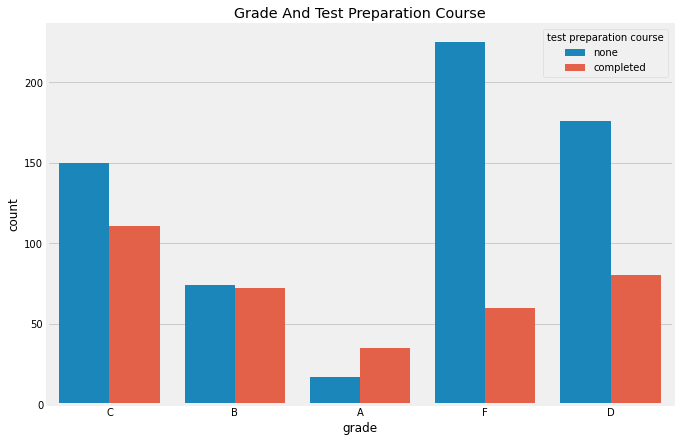

In [10]:
plt.figure(figsize=(10, 7))
plt.title('Grade and Test preparation course'.title())
sb.countplot(x='grade', hue='test preparation course', data=student_data)
plt.show()

## Grade and Race/ethnicity
> Students from Group B seems to be around average in all grades, while those of group C seems to get high pass and high fail too (looking at grade A and F). I think Group E did better in terms of grade because they got many A's, B's and lesser F's and D's.

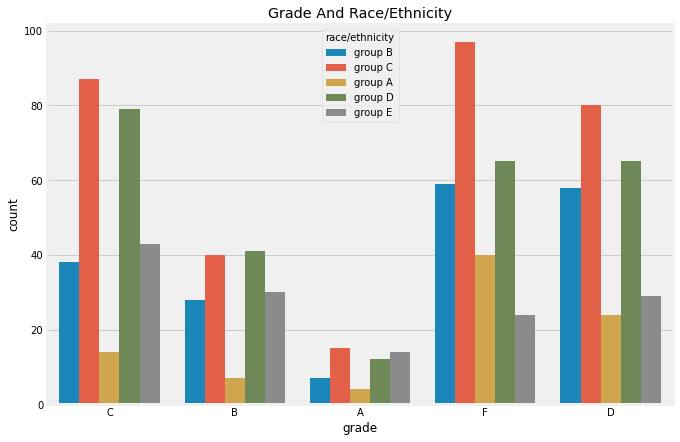

In [11]:
plt.figure(figsize=(10, 7))
plt.title('Grade and Race/ethnicity'.title())
sb.countplot(x='grade', hue='race/ethnicity', data=student_data)
plt.show()

## Grade and Lunch
> Students with standard lunch did quite better than those with free/reduced lunch. With less than 10 students who took free/reduced lunch getting an A while about 50 with standard lunch got an A. Also over 150 student with free/reduced lunch got an F.

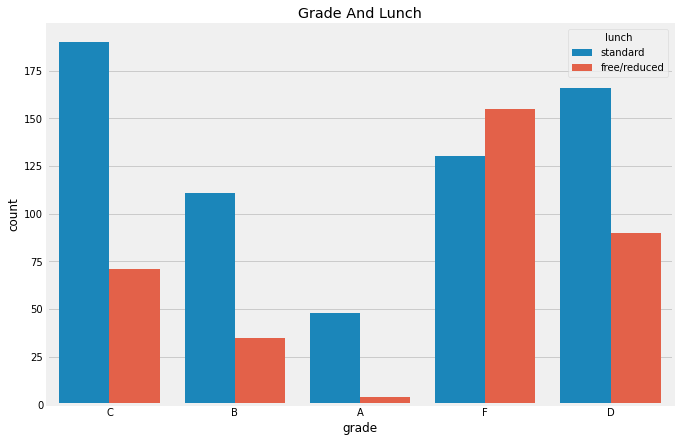

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Grade and Lunch'.title())
sb.countplot(x='grade', hue='lunch', data=student_data)
plt.show()

In [ ]:
!jupyter nbconvert part_II-student_performance_slide_deck.ipynb --to slides --post serve --no-input --no-prompt